# Importng the dataset

In [1]:
from pandas import read_csv
series = read_csv('intern_dataset.csv', header=0, index_col=0, squeeze=True)

Exploring the dataset as needed

In [2]:
print(series.head())

                              Signal1   Signal2 Label
Time                                                 
2017-08-14 11:37:49.791  33668.091913  0.856726     A
2017-08-14 11:37:49.801  32564.903040  0.856705     A
2017-08-14 11:37:49.811  31454.043305  0.856683     A
2017-08-14 11:37:49.821  30335.387166  0.856659     A
2017-08-14 11:37:49.831  29207.142938  0.856634     A


In [3]:
print(series.size)

2736000


<AxesSubplot:xlabel='Time'>

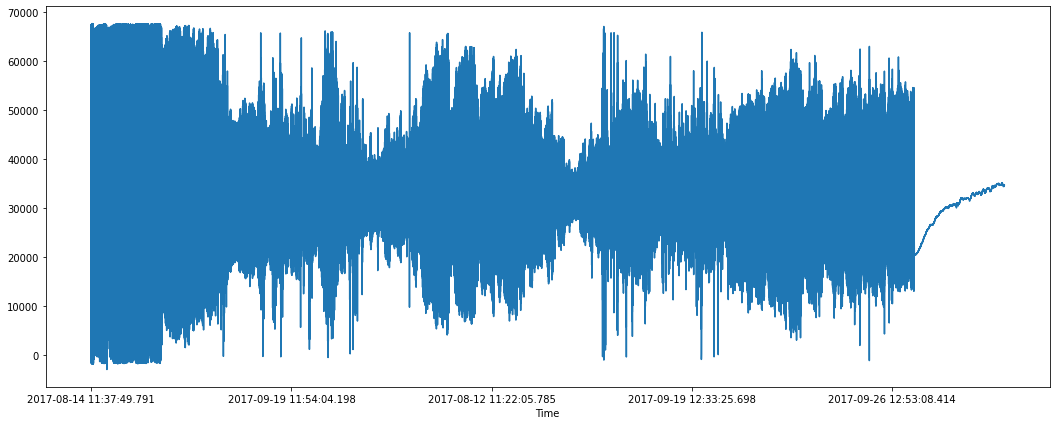

In [4]:
#plotting Signal 1

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
series['Signal1'].plot()

<AxesSubplot:xlabel='Time'>

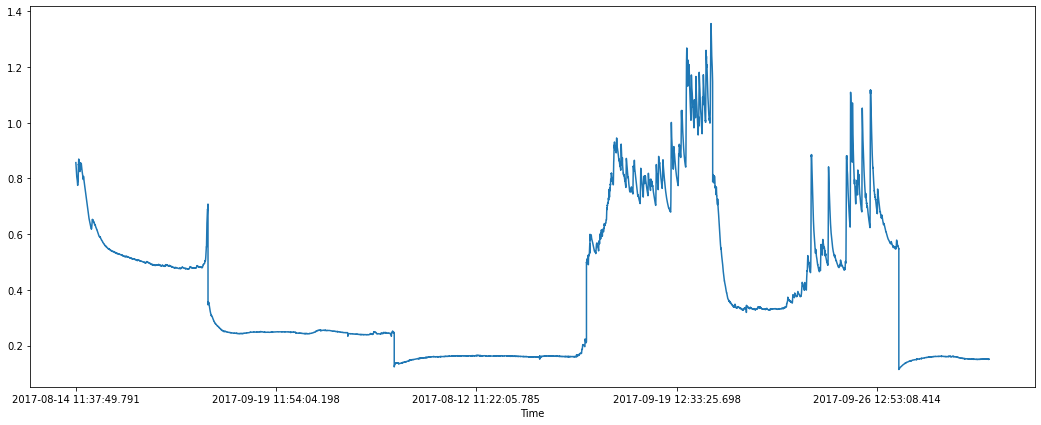

In [5]:
#plotting Signal 2

plt.figure(figsize=(18, 7))
series['Signal2'].plot()

In [6]:
series.head()

,Signal1,Signal2,Label
Time,,,
2017-08-14 11:37:49.791,33668.091913,0.856726,A
2017-08-14 11:37:49.801,32564.903040,0.856705,A
2017-08-14 11:37:49.811,31454.043305,0.856683,A
2017-08-14 11:37:49.821,30335.387166,0.856659,A
2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [7]:
# counting the types of values in column 'Label'

series.Label.value_counts()

A    318000
B    312000
C    282000
Name: Label, dtype: int64

In [8]:
#since there are 3 classes of labes, dividing the dataset in 3 respective parts

grouped = series.groupby(series.Label)
series_A = grouped.get_group("A")
series_B = grouped.get_group("B")
series_C = grouped.get_group("C")

In [9]:
#size of each part

print(series_A.size)
print(series_B.size)
print(series_C.size)

954000
936000
846000


In [10]:
#to make sure the dataset is rightly divided;

series_A.head(5)

,Signal1,Signal2,Label
Time,,,
2017-08-14 11:37:49.791,33668.091913,0.856726,A
2017-08-14 11:37:49.801,32564.903040,0.856705,A
2017-08-14 11:37:49.811,31454.043305,0.856683,A
2017-08-14 11:37:49.821,30335.387166,0.856659,A
2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [11]:
series_B.head(5)

,Signal1,Signal2,Label
Time,,,
2017-09-19 12:18:25.698,47842.554832,0.499167,B
2017-09-19 12:18:25.708,48258.447534,0.499155,B
2017-09-19 12:18:25.718,48654.923757,0.499143,B
2017-09-19 12:18:25.728,49015.036918,0.499130,B
2017-09-19 12:18:25.738,49323.169365,0.499117,B


In [12]:
series_C.head(5)

,Signal1,Signal2,Label
Time,,,
2017-08-12 11:08:25.785,22719.403196,0.123263,C
2017-08-12 11:08:25.795,23608.265317,0.123268,C
2017-08-12 11:08:25.805,24524.544926,0.123273,C
2017-08-12 11:08:25.815,25479.836092,0.123279,C
2017-08-12 11:08:25.825,26475.848059,0.123285,C


Plotting Signals 1 and 2 from each fragment of dataset

<AxesSubplot:xlabel='Time'>

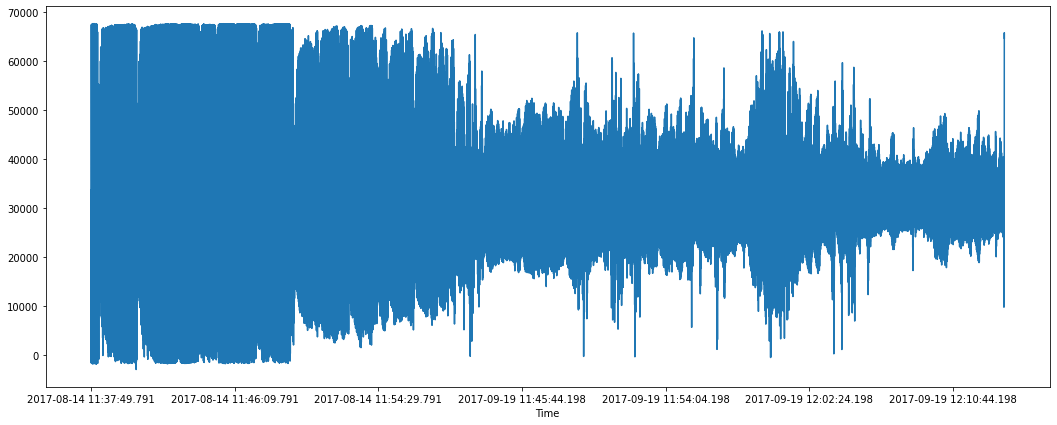

In [13]:
#Class A

plt.figure(figsize=(18, 7))
series_A['Signal1'].plot()

<AxesSubplot:xlabel='Time'>

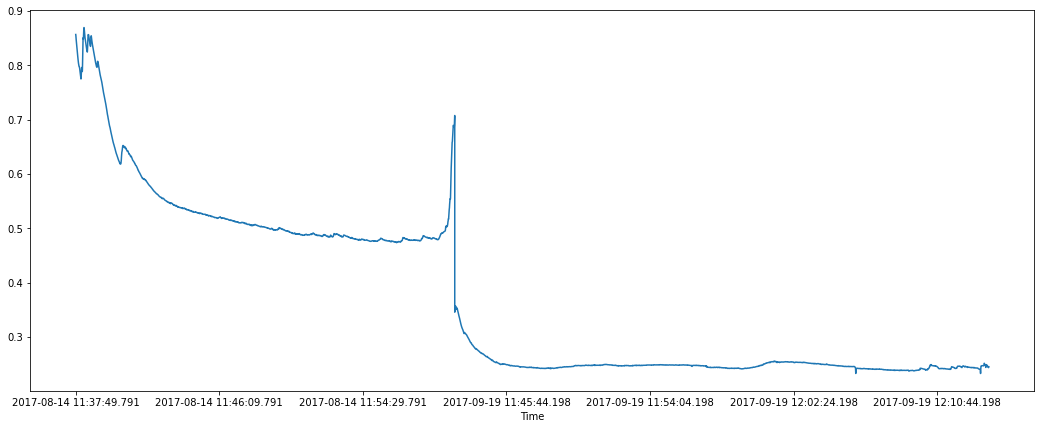

In [14]:
plt.figure(figsize=(18, 7))
series_A['Signal2'].plot()

<AxesSubplot:xlabel='Time'>

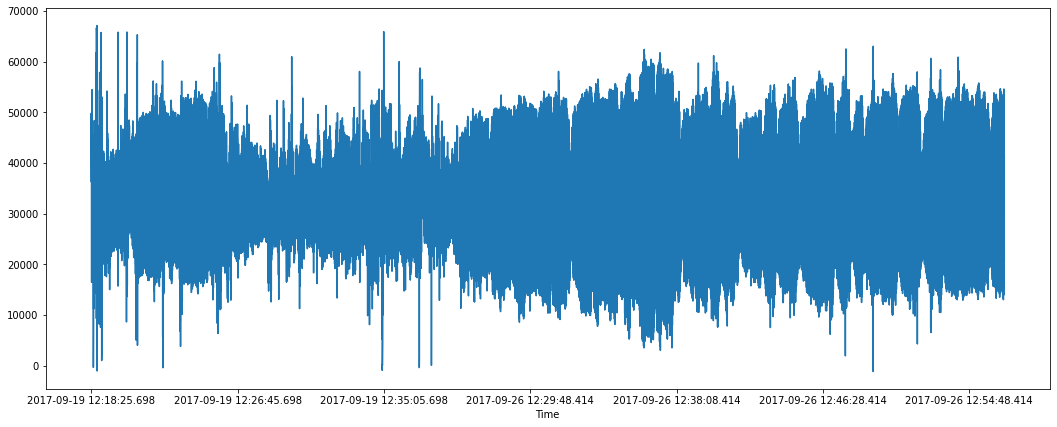

In [15]:
#Class B

plt.figure(figsize=(18, 7))
series_B['Signal1'].plot()

<AxesSubplot:xlabel='Time'>

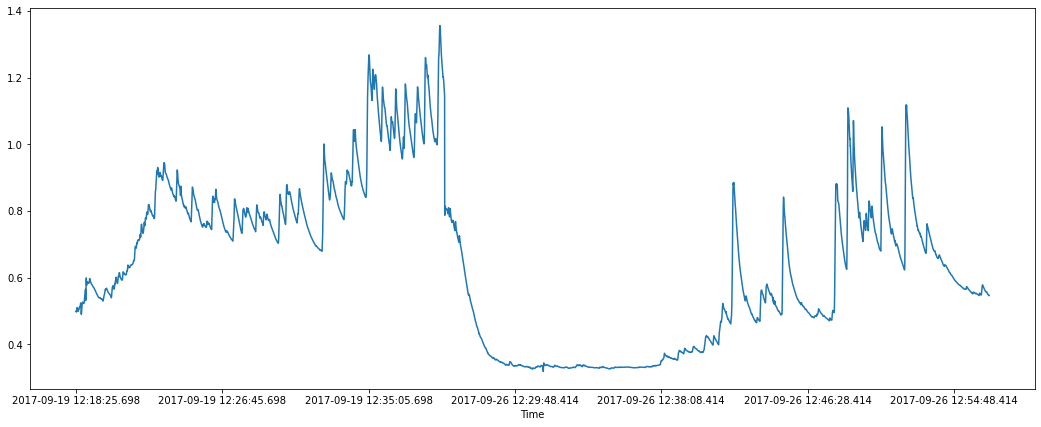

In [16]:
plt.figure(figsize=(18, 7))
series_B['Signal2'].plot()

<AxesSubplot:xlabel='Time'>

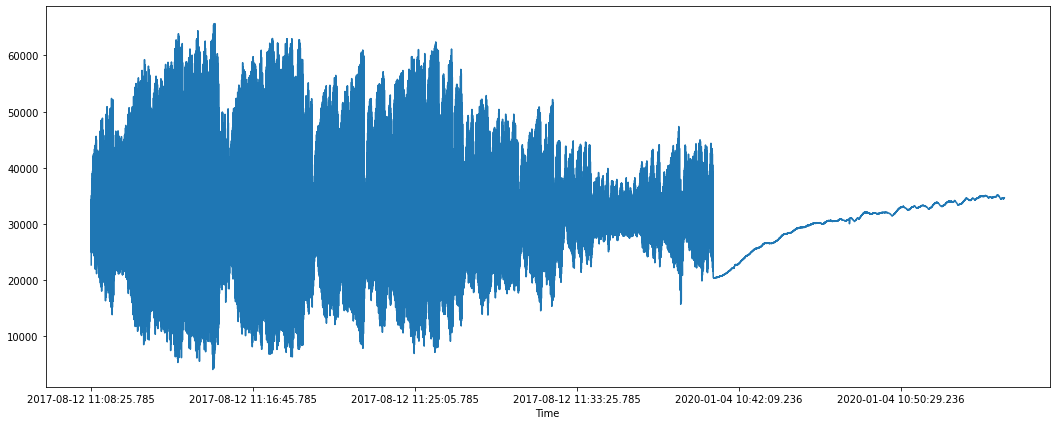

In [17]:
#Class C

plt.figure(figsize=(18, 7))
series_C['Signal1'].plot()

<AxesSubplot:xlabel='Time'>

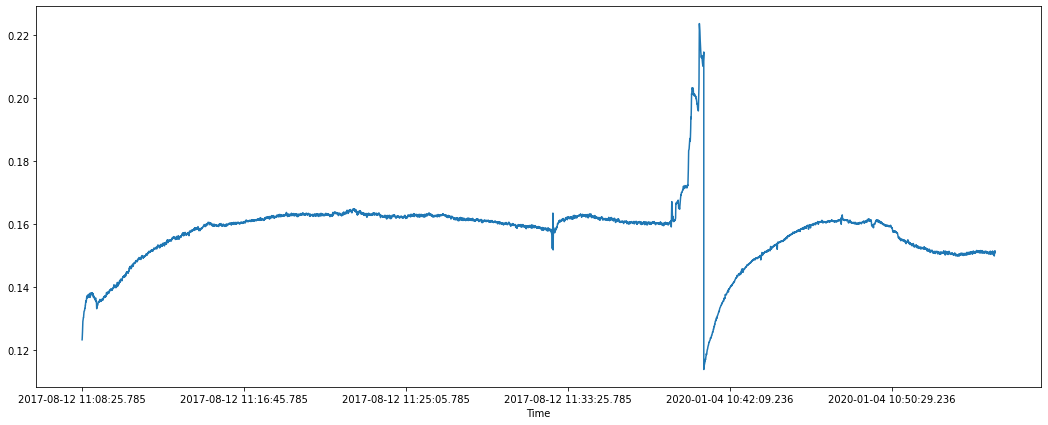

In [18]:
plt.figure(figsize=(18, 7))
series_C['Signal2'].plot()

# **Hurst Exponent Method**


Here we are using "**Hurst**" Library to find the Hurst exponent and eventually the Fractal dimensions for both signals 1 and 2 under each class. Computing the Hurst exponent *(H)* allows us to determine the persistance of data for data is said to be anti-persistant if *0 < H < 0.5* and persistant if *0.5 < H < 1*

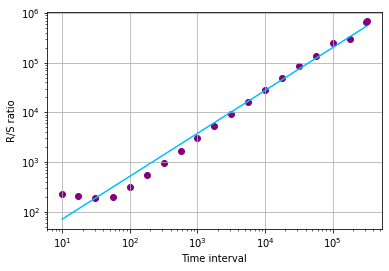

H=0.8629, c=9.7591


In [19]:
#Class A Signal 1

import numpy as np
from hurst import compute_Hc

# Evaluate Hurst equation for Signal 1
H, c, data = compute_Hc(series_A.Signal1, kind='change', simplified=True)

# Plotting the same
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [20]:
#since Dimension is 2-H
D1_A = 2 - H
print("The fractal dimension for Signal 1 is {:.4f}".format(D1_A))

The fractal dimension for Signal 1 is 1.1371


Hurst exponent for this signal is 0.8629 which implies the signal is quite persistant.

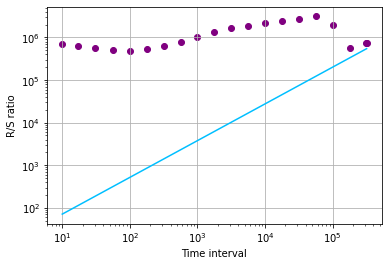

H2=0.0990, c2=479416.8041


In [21]:
# Evaluate Hurst equation for Signal 2
H2, c2, data = compute_Hc(series_A.Signal2, kind='change', simplified=True)

# Plotting the same
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H2={:.4f}, c2={:.4f}".format(H2,c2))

In [22]:
D2_A = 2 - H2
print("The fractal dimension for Signal 2 is {:.4f}".format(D2_A))

The fractal dimension for Signal 2 is 1.9010


In [23]:
hurst = list()
f_dimensions = list()

hurst.append([H,H2])
f_dimensions.append([D1_A,D2_A])
print(hurst)
print(f_dimensions)

[[0.8628882587637586, 0.09903525154192969]]
[[1.1371117412362413, 1.9009647484580703]]


We have the hurst exponent for signal2 as 0.0990. This implies the signal is inconsistant.
Thus in class A signal 1 is found to be persistant while signal 2 is not.

Moving to Class B

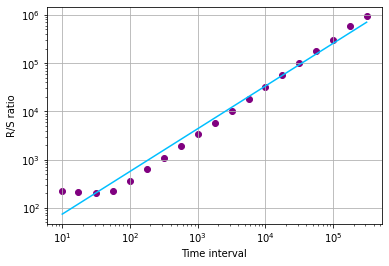

H3=0.8845, c3=9.7062


In [24]:
# Evaluate Hurst equation for Signal 1
H3, c3, data = compute_Hc(series_B.Signal1, kind='change', simplified=True)

# Plotting the same
f, ax = plt.subplots()
ax.plot(data[0], c3*data[0]**H3, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H3={:.4f}, c3={:.4f}".format(H3,c3))

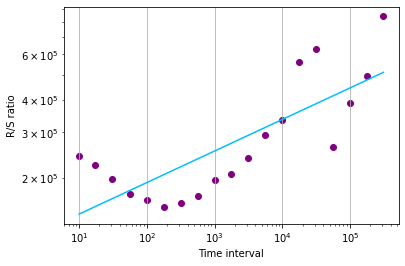

H4=0.1220, c4=109284.9951


In [25]:
# Evaluate Hurst equation for Signal 2
H4, c4, data = compute_Hc(series_B.Signal2, kind='change', simplified=True)

# Plotting the same
f, ax = plt.subplots()
ax.plot(data[0], c4*data[0]**H4, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H4={:.4f}, c4={:.4f}".format(H4,c4))

In [26]:
#since Dimension is 2-H
D1_B = 2 - H3
print("The fractal dimension for Signal 1 is {:.4f}".format(D1_B))

D2_B = 2 - H4
print("The fractal dimension for Signal 2 is {:.4f}".format(D2_B))

The fractal dimension for Signal 1 is 1.1155
The fractal dimension for Signal 2 is 1.8780


In [27]:
hurst.append([H3,H4])
f_dimensions.append([D1_B,D2_B])

In [28]:
print(hurst)
print(f_dimensions)

[[0.8628882587637586, 0.09903525154192969], [0.8844520168896329, 0.12195818827331292]]
[[1.1371117412362413, 1.9009647484580703], [1.1155479831103672, 1.878041811726687]]


In Class B, we found the hurst exp. of signal 1 to be 0.8844 and that of signal 2 to be 0.1219; impling a similar result as to that of class A. Signal 1 is quite consistent while signal 2 isn't.
However, looking at the values it is evident that signal 1 is losing its consistancy while moving from class A to B whilst signal 2 appears to be getting a little more consistent.

Moving on to Class C

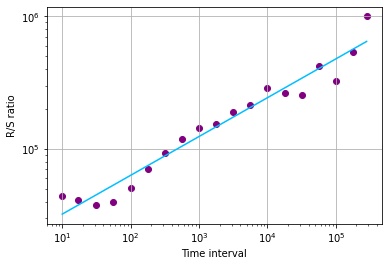

H5=0.2928, c5=16383.1417


In [29]:
# Evaluate Hurst equation for Signal 1
H5, c5, data = compute_Hc(series_C.Signal1, kind='change', simplified=True)

# Plotting the same
f, ax = plt.subplots()
ax.plot(data[0], c5*data[0]**H5, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H5={:.4f}, c5={:.4f}".format(H5,c5))

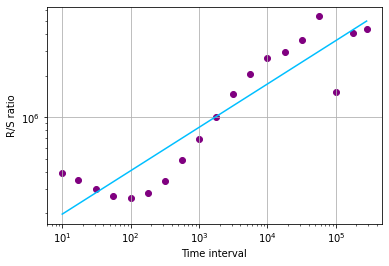

H6=0.3152, c6=95441.1205


In [30]:
# Evaluate Hurst equation for Signal 2
H6, c6, data = compute_Hc(series_C.Signal2, kind='change', simplified=True)

# Plotting the same
f, ax = plt.subplots()
ax.plot(data[0], c6*data[0]**H6, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H6={:.4f}, c6={:.4f}".format(H6,c6))

In [31]:
#since Dimension is 2-H
D1_C = 2 - H5
print("The fractal dimension for Signal 1 is {:.4f}".format(D1_C))

D2_C = 2 - H6
print("The fractal dimension for Signal 2 is {:.4f}".format(D2_C))

The fractal dimension for Signal 1 is 1.7072
The fractal dimension for Signal 2 is 1.6848


In [32]:
hurst.append([H5,H6])
print(hurst)

f_dimensions.append([D1_C,D2_C])
print(f_dimensions)

[[0.8628882587637586, 0.09903525154192969], [0.8844520168896329, 0.12195818827331292], [0.2928248764845244, 0.3151693489622948]]
[[1.1371117412362413, 1.9009647484580703], [1.1155479831103672, 1.878041811726687], [1.7071751235154755, 1.6848306510377051]]


In Class C, the values of Hurst exp. for signals 1 and 2 were 0.2928 and 0.3151 respectively. In this Class both the Signals appear to be anti-persistant. But value of H for signal 2 in this calss is still higher than that in class B. So Signal 2 appears to be getting more and more persistant as we move between classes.

# **Entropy Method**

We will be using Sample Entropy method next, to find out the nature of our dataset.
A lower value for the sample entropy corresponds to a higher probability indicating more self-similarity.

For the further operations we will be using the *EntroPy* API library at https://raphaelvallat.com/entropy/build/html/index.html by Raphael Vallat.

In [33]:
#Class A, Signal 1

from entropy import sample_entropy
s1_A = sample_entropy(series_A.Signal1)
print(s1_A)

0.19120914686458182


In [34]:
#Class A, Signal 2

s2_A = sample_entropy(series_A.Signal2)
print(s2_A)

1.9406984046165554e-05


In class A, Signal 1 has quite low entropy which indicates high level of self similarity which is quite consistent with the graph as not all values are similar but the graph does show a certain repitition in the figure.
For signal 2 however, the value of entropy is extremely low indicating very high similarity which is again consistant with our graph which is for most of the time almost flat.

Thus entropy values for class A are quite in agreement with our graphs.

In [35]:
#Class B, Signal 1

s1_B = sample_entropy(series_B.Signal1)
print(s1_B)

0.25626451791220006


In [36]:
#Class B, Signal 2

s2_B = sample_entropy(series_B.Signal2)
print(s2_B)

0.000613953363831047


For Class B as well the Entropy values for Signal 1 is somewhat higher than that in class A, this indicates a reducing steadiness in the Signal 1 readings. 
For Signal 2 also the entropy value is lower than signal 1 which is again correspondance with our visualizations but is quite higher than that in Class A thus indicating the obvious decline in steadiness from class A to B.

In [37]:
#Class C, Signal 1

s1_C = sample_entropy(series_C.Signal1)
print(s1_C)

0.12647746788570047


In [38]:
#Class C, Signal 2

s2_C = sample_entropy(series_C.Signal2)
print(s2_C)

0.0011111946394024548


In Class C, the entropy value of Signal 2 is lower than Signal 1 similar to previous classes; indicating that signal to is much more stable than signal 1. Also value of Signal 1 is lower than that in both classes A and B which indicates that Signal 1 is more self-similar in Class C than previous classes. Signal 2 on the other hand is less self-similar in class C than in A or B.

# **Conclusion**

Comparing the results of both the methods, we can acertain that both the methods show us a similar trend in the data. The values of entropy are a direct mathematical measure of uncertainity. Hence, they are better at telling us about the data than any other method. However, Entropy values are not actuatal but approximated, and hence we cannot simply rely on them. 
Hurst exponent method is robust and quite easy to use and understand. The values of hurst exponent can easily tell the the kind of distribution in our dataset.